# Optimizing Rosenbrock's function using BFGS and L-BFGS algorithms (with optimization)

In [1]:
using ForwardDiff
using LinearAlgebra

using NBInclude
# @nbinclude("BFGS_LBFGS.ipynb");
@nbinclude("BFGS_LBFGS_optimal.ipynb");
@nbinclude("Visualization.ipynb");

### Rosenbrock's Function

In [23]:
@views rosenbrock(Θ) = sum([100*(Θ[i+1]-Θ[i]^2)^2 + (1-Θ[i])^2 for i in 1:(length(Θ)-1)]);

In [24]:
@views rosenbrock_gradient(Θ::Array{Float64,1}) = ForwardDiff.gradient(rosenbrock, Θ);

### Rosenbrock BFGS

In [28]:
function rosenbrock_BFGS( Θ::Array{Float64,1}, max_iters::Int64, max_error::Float64 )
    DIM = length(Θ)
    Q = Matrix(1.0I, DIM, DIM)
    arguments = zeros(DIM, max_iters)
    losses = zeros(max_iters)
    
    for i in 1:max_iters
        # History
        arguments[:,i] = Θ
        losses[i] = rosenbrock(Θ)
        
        # Finding new weights and update
        Θ, Q[:] = BFGS( rosenbrock, rosenbrock_gradient, Θ, Q )
        
        if losses[i] < max_error
            return (view(arguments, :, 1:i), view(losses, 1:i), i, Q)
        end
    end
    return arguments, losses, max_iters, Q
end;

### BFGS Training

In [29]:
ITERS = 10;
ERROR = 10e-6;
# Θ = rand(2);
Θ = [0.1 ; 0.9];

In [31]:
arguments, losses, i, Q = rosenbrock_BFGS( Θ, ITERS, ERROR );

In [32]:
println(losses)
arguments

[80.02000000000001, 0.5277656858140837, 0.4991367940800219, 0.3932605632233049, 0.020546650349387633, 0.01991109885455737, 0.0075306663967651104, 0.0011236559443155076, 9.52922884174014e-5, 5.228298892563122e-6]


2×10 view(::Array{Float64,2}, :, 1:10) with eltype Float64:
 0.1  0.273654   0.312497   0.433954  …  0.973171  0.991798  1.00058
 0.9  0.0735178  0.0813829  0.161325     0.949072  0.983134  1.00094

### BFGS Visualization

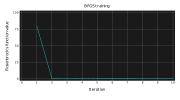

In [33]:
y = [round(v, digits=8) for v in losses]
visualize_training_process( length(y), y,
    "BFGS training", "Iteration", "Rosenbrock's function value" )

In [34]:
SPAN = 100; LEFT = 0; RIGHT = 1.5
ax = LinRange( LEFT, RIGHT, SPAN );

levels = [LinRange(0, 100, 20)...];

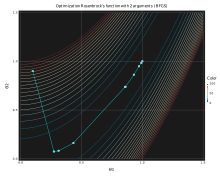

In [35]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), levels,
    arguments, 1,
    "Optimization Rosenbrock's function with 2 arguments (BFGS)",
    "Θ1", "Θ2",
)

In [37]:
arguments[:, end] # final (best) weights

2-element Array{Float64,1}:
 1.0005817707754003
 1.0009427501444386

### Rosenbrock L-BFGS

In [45]:
function rosenbrock_LBFGS( Θ::Array{Float64,1}, m::Int64,
                            max_iters::Int64, max_error::Float64 )
    DIM = length(Θ)
    δs, γs, qs = Array{Array{Float64, 1}, 1}(), Array{Array{Float64, 1}, 1}(), Array{Array{Float64, 1}, 1}()
    arguments = zeros(DIM, max_iters)
    losses = zeros(max_iters)
    
    for i in 1:max_iters
        # History
        arguments[:,i] = Θ
        losses[i] =  rosenbrock(Θ)
        
        # Finding new weights and update
        Θ, δs[:], γs[:], qs[:] = LBFGS(rosenbrock, rosenbrock_gradient, Θ, m, δs, γs, qs)
        
        if losses[i] < max_error
            return (view(arguments, :, 1:i), view(losses, 1:i), i, δs, γs, qs)
        end
    end
    return (arguments, losses, max_iters, δs, γs, qs)
end;

### L-BFGS Training

In [46]:
ITERS = 30;
ERROR = 10e-6;
m = 4;
Θ = rand(4);

In [47]:
arguments, losses, i, δs, γs, qs = rosenbrock_LBFGS(Θ, m, ITERS, ERROR);

In [48]:
println(losses)
arguments

[32.545619661121286, 8.13241992166088, 1.7935555737903748, 1.6296253582914813, 0.14373701959030866, 0.13094144099015811, 0.1303387210121404, 0.08157957143860571, 0.05983201029976502, 0.032079231996487864, 0.013859038828448907, 0.007346975827146437, 0.002549503664270051, 0.0007278076455950446, 0.0005801797015654158, 1.720329058192674e-5, 1.9582612331421523e-6]


4×17 view(::Array{Float64,2}, :, 1:17) with eltype Float64:
 0.743803  0.831216  0.848712  0.842267  …  0.997644  0.999269  1.00004
 0.769484  0.672506  0.799066  0.808253     0.994993  0.998477  0.999965
 0.497376  0.662584  0.737368  0.725024     0.988856  0.996913  0.999841
 0.763143  0.624098  0.518464  0.523167     0.976154  0.994042  0.999703

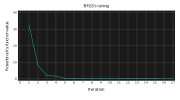

In [49]:
y = [round(v, digits=8) for v in losses]
visualize_training_process( length(y), y,
    "BFGS training", "Iteration", "Rosenbrock's function value" )

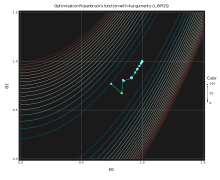

In [50]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), levels,
    arguments, 1,
    "Optimization Rosenbrock's function with 4 arguments (L-BFGS)",
    "Θ1", "Θ2",
)